In [1]:
 # Colab'ta eksik olabilecek paketler
!pip install -q nltk scikit-learn joblib

import nltk, os
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import files
uploaded = files.upload()        # .csv dosyanızı seçin

import pandas as pd
df = pd.read_csv(next(iter(uploaded)))      # ilk yüklenen dosyayı okuyacak
df.head()


Saving ÖZNEL-NESNEL VERİ KÜMESİ.csv to ÖZNEL-NESNEL VERİ KÜMESİ.csv


,Cümle,Tür,Unnamed: 2,Cümle,Tür.1
0,Bugün hava çok güzel ve ferah.,Öznel,NaN,Üçgenin iç açılarının toplamı 180 derecedir.,Nesnel
1,O filmi izlemek büyük bir zaman kaybıydı.,Öznel,NaN,Güneş sistemindeki gezegenlerin sayısı sekizdi...,Nesnel
2,Çikolata yemek en sevdiğim şeydir.,Öznel,NaN,"Ders notları, öğrencilere e-posta yoluyla gönd...",Nesnel
3,Bu kitap hayatımı değiştirdi diyebilirim.,Öznel,NaN,"Bu film, eleştirmenler tarafından övgüyle karş...",Nesnel
4,"Masadaki çiçekler çok güzel kokuyor, kim aldı ...",Öznel,NaN,"Karbon, periyodik tablonun 6. grubunda yer alı...",Nesnel


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Cümle').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Cümle ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cümle')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cümle', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cümle ')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cümle ', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cümle '].value_counts()
    for x_label, grp in _df_6.groupby('Cümle')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cümle')
_ = plt.ylabel('Cümle ')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Cümle'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='Cümle', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Cümle '].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Cümle ', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [4]:
# --- Ön‑işleme: Sadece stop‑word ve temizlik ---
stop_tr = set(stopwords.words('turkish'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zçğıöşü\s]', ' ', text)
    tokens = [w for w in text.split() if w not in stop_tr]
    return ' '.join(tokens)

df = df.dropna(subset=['Cümle','Tür'])
df['clean'] = df['Cümle'].apply(preprocess)
y = df['Tür'].map({'Öznel':1, 'Nesnel':0})


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10], 'penalty':['l2'], 'solver':['lbfgs']}
grid = GridSearchCV(
    LogisticRegression(max_iter=2000, class_weight='balanced'),
    param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1
)
grid.fit(X_train, y_train)

best_lr = grid.best_estimator_
print("En iyi parametreler:", grid.best_params_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_lr.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Nesnel','Öznel']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
import joblib, pickle
joblib.dump(best_lr,  'logreg_subjectivity.joblib')
joblib.dump(tfidf,    'tfidf_vectorizer.joblib')

# Colab'dan bilgisayarınıza indirmek için:
files.download('logreg_subjectivity.joblib')
files.download('tfidf_vectorizer.joblib')


In [7]:
import pandas as pd

df_raw = pd.read_csv('ÖZNEL-NESNEL VERİ KÜMESİ.csv')

# Sol blok
left  = df_raw[['Cümle', 'Tür']].rename(columns={'Cümle':'sentence', 'Tür':'label'})

# Sağ blok (bazı sütun adlarında boşluk var!)
right = df_raw[['Cümle ', 'Tür.1']].rename(columns={'Cümle ':'sentence', 'Tür.1':'label'})

# İki bloğu alt alta birleştir
df = pd.concat([left, right], ignore_index=True)

# Boş satır/NaN ve baş‑son boşlukları temizle
df = df.dropna(subset=['sentence','label'])
df['sentence'] = df['sentence'].str.strip()
df['label']    = df['label'].str.strip().str.capitalize()   # "öZNeL " -> "Öznel"

# Son kontrol
print(df.head(), '\n\nSınıf dağılımı:\n', df['label'].value_counts())


                                            sentence  label
0                     Bugün hava çok güzel ve ferah.  Öznel
1          O filmi izlemek büyük bir zaman kaybıydı.  Öznel
2                 Çikolata yemek en sevdiğim şeydir.  Öznel
3          Bu kitap hayatımı değiştirdi diyebilirim.  Öznel
4  Masadaki çiçekler çok güzel kokuyor, kim aldı ...  Öznel 

Sınıf dağılımı:
 label
Öznel     2019
Nesnel    2019
Name: count, dtype: int64


In [8]:
y = df['label'].map({'Öznel':1, 'Nesnel':0})

In [9]:
import re, nltk, joblib
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')
stop_tr = set(stopwords.words('turkish'))

def preprocess(t):
    t = re.sub(r'[^a-zA-ZçğıöşüÇĞİÖŞÜ\s]', ' ', t.lower())
    tokens = [w for w in t.split() if w not in stop_tr]
    return ' '.join(tokens)

df['clean'] = df['sentence'].apply(preprocess)

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X     = tfidf.fit_transform(df['clean'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Nesnel','Öznel']))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

      Nesnel       0.95      0.97      0.96       303
       Öznel       0.97      0.95      0.96       303

    accuracy                           0.96       606
   macro avg       0.96      0.96      0.96       606
weighted avg       0.96      0.96      0.96       606

[[294   9]
 [ 14 289]]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
joblib.dump(model, 'logreg_subjectivity.joblib')
joblib.dump(tfidf,  'tfidf_vectorizer.joblib')

def classify_sentence(sent):
    vec = tfidf.transform([preprocess(sent)])
    return 'Öznel' if model.predict(vec)[0]==1 else 'Nesnel'

print(classify_sentence("Bence bu film harika"))         # Öznel
print(classify_sentence("Su 100°C'de kaynar"))           # Nesnel


Öznel
Nesnel


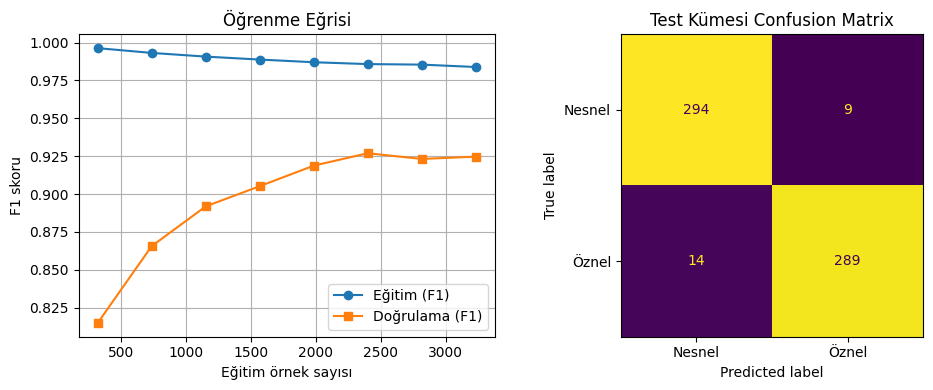

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# --- 1) Öğrenme Eğrisi ----------------------------------------------------
train_sizes, train_scores, val_scores = learning_curve(
    model,                    # eğittiğiniz LogisticRegression
    X, y,                     # TF‑IDF matrisi ve etiketler
    cv=5,
    scoring='f1',
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_sizes, train_mean, marker='o', label='Eğitim (F1)')
plt.plot(train_sizes, val_mean,   marker='s', label='Doğrulama (F1)')
plt.xlabel('Eğitim örnek sayısı')
plt.ylabel('F1 skoru')
plt.title('Öğrenme Eğrisi')
plt.grid(True)
plt.legend()

# --- 2) Confusion Matrix --------------------------------------------------
y_pred_test = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test, labels=[0,1])
disp = ConfusionMatrixDisplay(cm, display_labels=['Nesnel','Öznel'])

plt.subplot(1,2,2)
disp.plot(ax=plt.gca(), colorbar=False)
plt.title('Test Kümesi Confusion Matrix')

plt.tight_layout()
plt.show()
